# Predicting DNA Cyclizability using Cluser Expansion

**CLUSTER EXPANSION EQUATION:**

$$
    \displaystyle
    C_{0} = 
    
    \langle C_{0} \rangle
     
     + \sum_{ i,\alpha } W_{ i }^{ \alpha } ( S_{ i }^{ \alpha } - \langle S_{ i }^{ \alpha } \rangle ) 
     
     + \frac{1}{2} \sum_{ i \neq j , \alpha \beta } J_{ ij }^{ \alpha \beta } ( S_{ i }^{ \alpha } - \langle S_{ i }^{ \alpha } \rangle ) ( S_{ j }^{ \beta } - \langle S_{ j }^{ \beta } \rangle ) 
     
     + \frac{1}{6} \sum_{ i \neq j \neq k , \alpha \beta \gamma } G_{ ijk }^{ \alpha \beta \gamma } ( S_{ i }^{ \alpha } - \langle S_{ i }^{ \alpha } \rangle ) ( S_{ j }^{ \beta } - \langle S_{ j }^{ \beta } \rangle ) (S_{ k }^{ \gamma } - \langle S_{ k }^{ \gamma } \rangle)
$$

In [ ]:
'''
Imports
'''

proj_dir = '/Users/prabh/200 RESEARCH/Cluster Expansion Project'

# gives the notebook access to the cluster_expansion personal library
from sys import path
path.append(proj_dir)
import cluster_expansion as ce
from cluster_expansion import os, pd, np, plt, sns, tf, Markdown, display, train_test_split

/Users/prabh/200 RESEARCH/Cluster Expansion Project/venv/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Reading the data in from text file

In [ ]:
# read the data in from text file

df = pd.read_csv("../Data/Random/Random_adapterfree.dat", sep = "\t")

# extract sequence and cyclizability values
sequenceArray = np.array(df['Sequence'])
c0Array = df['C0free'].values.astype(np.float32)


# display first and last 2 sequences
display(pd.DataFrame(sequenceArray, columns = ["First 2 sequences"]).head(2), pd.DataFrame(c0Array, columns = ["First 2 C0 vals"]).head(2))
display(pd.DataFrame(sequenceArray, columns = ["Last 2 sequences"]).tail(2), pd.DataFrame(c0Array, columns = ["Last 2 C0 vals"]).tail(2))


,First 2 sequences
0,TCCGCACTTATGTACTGTGCTGAGATATAGTAGATTCTGCGTGTGA...
1,GTCTCGATCCACCGCTAGTAGTAAGACAACAGGGCTGCCTGGCTTC...


,First 2 C0 vals
0,-0.193753
1,-0.148046


,Last 2 sequences
12402,TCTGGGGGTGGTCTCGTTCGAGTTTCCGGAGAATAGACTCGGCGGG...
12403,AGGATCCCCCCGACTAGTACTGAAGTAACCAGCTATTCCTGTTTGG...


,Last 2 C0 vals
12402,-0.453233
12403,-0.155228


### Convert sequences --> onehot

In [3]:
# convert sequence strings to onehot vectors

onehotArray= ce.Data2Onehot(sequenceArray)
display(pd.DataFrame(onehotArray).astype(int).head(2))

Encoded all sequences to onehot


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Testing conversion (onehot --> sequences)

In [4]:
# convert onehot vectors back to sequence strings

DNA_strings = ce.Onehot2Data(onehotArray, 'ATCG')

display(pd.DataFrame(DNA_strings, columns = ["First 2 sequences"]).head(2))
display(pd.DataFrame(DNA_strings, columns = ["Last 2 sequences"]).tail(2))

,First 2 sequences
0,TCCGCACTTATGTACTGTGCTGAGATATAGTAGATTCTGCGTGTGA...
1,GTCTCGATCCACCGCTAGTAGTAAGACAACAGGGCTGCCTGGCTTC...


,Last 2 sequences
12402,TCTGGGGGTGGTCTCGTTCGAGTTTCCGGAGAATAGACTCGGCGGG...
12403,AGGATCCCCCCGACTAGTACTGAAGTAACCAGCTATTCCTGTTTGG...


## W vector

$$
    W_{i}^{\alpha} = 
        4
        ( C_{ 0 } - \langle C_{ 0 } \rangle )
        ( S_{ i }^{ \alpha } - \langle S_{ i }^{ \alpha } \rangle)
$$

### Training and Result

In [ ]:
# training on the random library

Wtensor = ce.trainW(onehotArray, c0Array)
print(type(Wtensor[ 0 ]))

plt.figure(figsize=(5,5))
plt.plot(Wtensor, color = 'g', marker = ".", linestyle = "")
plt.axline((0,0), (199,0), color = "#000000")
plt.xlabel("Index i-alpha")
plt.ylabel("Value")
plt.ylim(-0.02, 0.02)
plt.title("W tensor index values")
plt.show()

print(f"sum(Wtensor) = {np.sum(Wtensor):.4f}")

## J matrix

$$ 
    J_{ ij }^{ \alpha \beta } = 
    16 
    \langle 
        ( C_{ 0 } - \langle C_{ 0 } \rangle )
        ( S_{ i }^{ \alpha } - \langle S_{ i }^{ \alpha } \rangle )
        
        (S_{ j }^{ \beta } - \langle S_{ j }^{ \beta } \rangle ) 
    \rangle,
$$

### Training and Result

In [ ]:
# training on the random library

Jtensor = ce.trainJ(onehotArray, c0Array)
print(type(Jtensor[ 0,0 ]))

plt.figure(figsize=(5, 5))
plt.imshow(Jtensor, cmap='bwr', vmin=-0.02, vmax=0.02, origin = 'lower')
plt.colorbar(label='J value', shrink=0.8)
plt.title("J tensor Heatmap")
plt.xlabel("Index i alpha")
plt.ylabel("Index j beta")
plt.show()

print(f"sum(Jtensor) = {np.sum(Jtensor):.4f}")

### Imposing Invariances

$$J_{i,j \gt i}^{\alpha \beta} \rightarrow \frac{1}{N-j+i} \sum\limits_{k = 1}^{N-j+i} J_{k, k+j-i}^{\alpha \beta}$$

$$J_{ij}^{\alpha \beta} \rightarrow \frac{1}{2} (J_{ij}^{\alpha \beta} + J_{ij}^{\beta' \alpha'})$$

In [ ]:
"""
Test Invariances and plot
"""

Jtensor_TI = ce.TranslationInvariance(Jtensor)
Jtensor_invarianced = ce.ReverseComplementInvariance(Jtensor_TI)

plt.figure(figsize=(5, 5))
plt.imshow(Jtensor_invarianced, cmap='bwr', vmin=-0.02, vmax=0.02, origin = 'lower')
plt.colorbar(label='J value', shrink = 0.8)
plt.title("J matrix Heatmap")
plt.xlabel("Index i alpha")
plt.ylabel("Index j beta")
plt.show()

In [ ]:
step = 0.01
tick_arr = np.arange(-0.02, 0.02 + step, step)
plt.figure(figsize=(10, 5))
plt.suptitle("Before and after invariancing J matrix", fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(Jtensor, cmap='bwr', vmin=-0.02, vmax=0.02, origin='lower')
plt.colorbar(label='value', shrink=0.7, format = '%.2f', ticks = tick_arr)
plt.title("Raw")
plt.xlabel("Index i alpha")
plt.ylabel("Index jβ beta")

plt.subplot(1, 2, 2)
plt.imshow(Jtensor_invarianced, cmap='bwr', vmin=-0.02, vmax=0.02, origin='lower')
plt.colorbar(label='value', shrink=0.7, format = '%.2f', ticks = tick_arr)
plt.title("Invarianced")
plt.xlabel("Index i alpha")
plt.ylabel("Index j beta")

plt.tight_layout()
plt.show()

## G tensor

$$
    G_{ijk}^{\alpha \beta \gamma} = 64 \langle (C_0 - \langle C_0 \rangle) (S_i^{\alpha} - \langle S_i^{\alpha} \rangle)(S_j^{\beta} - \langle S_j^{\beta} \rangle) (S_k^{\gamma} - \langle S_k^{\gamma} \rangle)\rangle,
$$

### Training and Result

In [ ]:
"""
Testing on the sequence data
"""

Gtensor = ce.trainG_numba(onehotArray, c0Array)

print(f"sum(Gtensor) = {np.sum(Gtensor):.4f}")

### Checking random indices of the G tensor

In [ ]:
# Define the Idx2Base function to convert indices to DNA bases
def Idx2Base(idx):
    bases = ['A', 'T', 'C', 'G']
    return f"{idx//4}_{bases[idx%4]}"

# Print the Gtensor element at random indices
for i in range(4):
    i1, j1, k1 = np.random.randint(0, Gtensor.shape[0]), np.random.randint(0, Gtensor.shape[1]), np.random.randint(0, Gtensor.shape[2])
    i2, j2, k2 = np.random.randint(0, Gtensor.shape[0]), np.random.randint(0, Gtensor.shape[1]), np.random.randint(0, Gtensor.shape[2])
    i3, j3, k3 = np.random.randint(0, Gtensor.shape[0]), np.random.randint(0, Gtensor.shape[1]), np.random.randint(0, Gtensor.shape[2])
    i4, j4, k4 = np.random.randint(0, Gtensor.shape[0]), np.random.randint(0, Gtensor.shape[1]), np.random.randint(0, Gtensor.shape[2])

    print(f"Gtensor[ {ce.Idx2Base(i1)}, {ce.Idx2Base(j1)}, {ce.Idx2Base(k1)} ] = {Gtensor[i1, j1, k1]:.3f}")
    print(f"Gtensor[ {ce.Idx2Base(i2)}, {ce.Idx2Base(j2)}, {ce.Idx2Base(k2)} ] = {Gtensor[i2, j2, k2]:.3f}")
    print(f"Gtensor[ {ce.Idx2Base(i3)}, {ce.Idx2Base(j3)}, {ce.Idx2Base(k3)} ] = {Gtensor[i3, j3, k3]:.3f}")
    print(f"Gtensor[ {ce.Idx2Base(i4)}, {ce.Idx2Base(j4)}, {ce.Idx2Base(k4)} ] = {Gtensor[i4, j4, k4]:.3f}")
    print()

### Imposing Invariances

In [ ]:
Gtensor_TI = ce.TranslationInvariance_G(Gtensor)
Gtensor_invarianced = ce.ReverseComplementInvariance_G(Gtensor_TI)

In [ ]:
# Print the Gtensor element at random indices
for i in range(4):
    i1, j1, k1 = np.random.randint(0, Gtensor.shape[0]), np.random.randint(0, Gtensor.shape[1]), np.random.randint(0, Gtensor.shape[2])
    i2, j2, k2 = np.random.randint(0, Gtensor.shape[0]), np.random.randint(0, Gtensor.shape[1]), np.random.randint(0, Gtensor.shape[2])
    i3, j3, k3 = np.random.randint(0, Gtensor.shape[0]), np.random.randint(0, Gtensor.shape[1]), np.random.randint(0, Gtensor.shape[2])
    i4, j4, k4 = np.random.randint(0, Gtensor.shape[0]), np.random.randint(0, Gtensor.shape[1]), np.random.randint(0, Gtensor.shape[2])

    print(f"Gtensor[ {ce.Idx2Base(i1)}, {ce.Idx2Base(j1)}, {ce.Idx2Base(k1)} ] = {Gtensor_invarianced[i1, j1, k1]:.3f}")
    print(f"Gtensor[ {ce.Idx2Base(i2)}, {ce.Idx2Base(j2)}, {ce.Idx2Base(k2)} ] = {Gtensor_invarianced[i2, j2, k2]:.3f}")
    print(f"Gtensor[ {ce.Idx2Base(i3)}, {ce.Idx2Base(j3)}, {ce.Idx2Base(k3)} ] = {Gtensor_invarianced[i3, j3, k3]:.3f}")
    print(f"Gtensor[ {ce.Idx2Base(i4)}, {ce.Idx2Base(j4)}, {ce.Idx2Base(k4)} ] = {Gtensor_invarianced[i4, j4, k4]:.3f}")
    print()


## Testing Model Accuracy

$$
    C_{0} = 
    
    \langle C_{0} \rangle
     
     + \sum_{ i,\alpha } W_{ i }^{ \alpha } ( S_{ i }^{ \alpha } - \langle S_{ i }^{ \alpha } \rangle ) 
     
     + \frac{1}{2} \sum_{ i \neq j , \alpha \beta } J_{ ij }^{ \alpha \beta } ( S_{ i }^{ \alpha } - \langle S_{ i }^{ \alpha } \rangle ) ( S_{ j }^{ \beta } - \langle S_{ j }^{ \beta } \rangle ) 
     
     + \frac{1}{6} \sum_{ i \neq j \neq k , \alpha \beta \gamma } G_{ ijk }^{ \alpha \beta \gamma } ( S_{ i }^{ \alpha } - \langle S_{ i }^{ \alpha } \rangle ) ( S_{ j }^{ \beta } - \langle S_{ j }^{ \beta } \rangle ) (S_{ k }^{ \gamma } - \langle S_{ k }^{ \gamma } \rangle)
$$

### Predicting $C0_{free}$ by training and testing on 90/10 splits of the random library

#### J matrix Tests

In [ ]:
display(onehotArray.shape)
display(c0Array.shape)

In [ ]:
iters = 10

vmin = 0
vmax = 20
n_bins = 100

(_, meas, pred), (r, rErr, prec) = ce.crossValidationSplits(onehotArray, c0Array, iterations = iters,
               trainWvector = True)
print(len(meas), len(pred))
ce.plot_hist2d(meas, pred, r, rErr, vmin, vmax, fig_dim = 6, n_bins = n_bins, precision = prec)

(_, meas, pred), (r, rErr, prec) = ce.crossValidationSplits(onehotArray, c0Array, iterations = iters,
               trainWvector = True, trainJmatrix = True)
print(len(meas), len(pred))
ce.plot_hist2d(meas, pred, r, rErr, vmin, vmax, fig_dim = 6, n_bins = n_bins, precision = prec)

(_, meas, pred), (r, rErr, prec) = ce.crossValidationSplits(onehotArray, c0Array, iterations = iters,
               trainWvector = True, trainJmatrix = True, invarianceJ = True)
print(len(meas), len(pred))
ce.plot_hist2d(meas, pred, r, rErr, vmin, vmax, fig_dim = 6, n_bins = n_bins, precision = prec)

#### G tensor Tests

In [ ]:
iters = 1

(_, meas, pred), (r, rErr, prec) = ce.crossValidationSplits(onehotArray, c0Array, iterations = 1,
               trainWvector = True, trainJmatrix = True, trainGtensor = True)
ce.plot_hist2d(meas, pred, r, rErr, vmin, vmax, fig_dim = 6, n_bins = n_bins, precision = prec)

(_, meas, pred), (r, rErr, prec) = ce.crossValidationSplits(onehotArray, c0Array, iterations = 1,
               trainWvector = True, trainJmatrix = True, invarianceJ = True,
               trainGtensor = True, invarianceG = True)
ce.plot_hist2d(meas, pred, r, rErr, vmin, vmax, fig_dim = 6, n_bins = n_bins, precision = prec)

#### Results:

$$
\begin{aligned}
\text{W: } &\quad \textcolor{#FFB378}{0.05 \pm 0.03} \\
\text{W + J: } &\quad \textcolor{#FFB378}{0.46 \pm 0.03} \\
\text{W + J': } &\quad \textcolor{#FFB378}{0.68 \pm 0.02} \\
\text{W + J + G: } &\quad \textcolor{#FFB378}{0.08 \pm 0.03} \\
\text{W + J' + G': } &\quad \textcolor{#FFB378}{0.50 \pm 0.03}
\end{aligned}
$$

## Generating Sequences with a Neural Network

### Training the model

In [6]:
modelPath = '../CNN_models/RC_variant/SequenceFeatures.keras'
dataFilepath = '../Data/Random/Random_adapterfree.dat'

# if the model is already trained, skip the training and just load it in
if os.path.exists(modelPath):
    model = tf.keras.models.load_model(modelPath)
    predicted, measured = None, None
else:
    model, (predicted, measured) = ce.TrainModel(dataFilepath=dataFilepath, sep='\t')
    model.save(modelPath)

# option to retrain and resave the new model
overwrite = False
if overwrite:
    model, (predicted, measured) = ce.TrainModel(dataFilepath = dataFilepath, sep = '\t')
    model.save(modelPath)

In [7]:
display(pd.DataFrame(predicted).head(2))
display(pd.DataFrame(measured).head(2))

if predicted is not None and measured is not None:
      print(f'''Average c0 measured: {np.mean(measured):.3f}
Average c0 predicted: {np.mean(predicted):.3f}''')

""


""


### checking model correlation 

In [8]:
# read the data in from text file

df2 = pd.read_csv("../Data/Random/Random_adapterfree.dat", sep = "\t")

# extract sequence and cyclizability values
sequenceArray2 = np.array(df2['Sequence'])
c0Array2 = df2['C0free'].values.astype(np.float32)


# display first and last 2 sequences
display(pd.DataFrame(sequenceArray2, columns = ["First 2 sequences"]).head(2), pd.DataFrame(c0Array2, columns = ["First 2 C0 vals"]).head(2))
display(pd.DataFrame(sequenceArray2, columns = ["Last 2 sequences"]).tail(2), pd.DataFrame(c0Array2, columns = ["Last 2 C0 vals"]).tail(2))

# convert sequence strings to onehot vectors

onehotArray2 = ce.Data2Onehot(sequenceArray2)

,First 2 sequences
0,TCCGCACTTATGTACTGTGCTGAGATATAGTAGATTCTGCGTGTGA...
1,GTCTCGATCCACCGCTAGTAGTAAGACAACAGGGCTGCCTGGCTTC...


,First 2 C0 vals
0,-0.193753
1,-0.148046


,Last 2 sequences
12402,TCTGGGGGTGGTCTCGTTCGAGTTTCCGGAGAATAGACTCGGCGGG...
12403,AGGATCCCCCCGACTAGTACTGAAGTAACCAGCTATTCCTGTTTGG...


,Last 2 C0 vals
12402,-0.453233
12403,-0.155228


Encoded all sequences to onehot


In [9]:
# Test the model on the random library
print(model.input_shape)
onehotArrayTest = onehotArray2.reshape(onehotArray2.shape[0], 200, 1)
onehotArrayTestRC = ce.Data2Onehot(ce.SeqArr2RevCompArr(ce.Onehot2Data(onehotArray2))).reshape(onehotArray2.shape[0], 200, 1)

predictions = model.predict(onehotArrayTest)
predictionsRC = model.predict(onehotArrayTestRC)

predictions = predictions.reshape(12404)
print(predictions.shape, c0Array2.shape)
print(type(predictions), type(c0Array2))

display(pd.DataFrame(predictions).head(2))
display(pd.DataFrame(c0Array2).head(2))

(None, 200, 1)
Encoded all sequences to onehot
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(12404,) (12404,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


,0
0,-0.243182
1,-0.067808


,0
0,-0.193753
1,-0.148046


In [10]:
# gather correlation coefficients
r, se_z, prec, d_low, d_high = ce.pearson(predictions, c0Array2)

# print out averages
print(f'Pearson correlation: {r:.{prec}f}, [{d_low:.{prec}f}, {d_high:.{prec}f}]')

Pearson correlation: 0.9761, [-0.0008, 0.0008]


### Generating Sequences

In [11]:
# number of sequences to generate
sFactor = 10
numSequences = 10_000 * sFactor

MLonehot, MLc0 = ce.GenerateSyntheticData(model, numSequences, enforceSymmetry=False)

display(pd.DataFrame(MLonehot))
display(pd.DataFrame(MLc0))

MLc0 = MLc0.reshape(len(MLc0))
print(f'Average c0 of generated data = {np.mean(MLc0):.4f}')

Encoded all sequences to onehot
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
99996,1,0,0,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,1
99997,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
99998,0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1


,0
0,-0.255148
1,0.221159
2,-0.325832
3,-0.413517
4,-0.426874
...,...
99995,-0.294432
99996,-0.336124
99997,-0.436439
99998,-0.374498


Average c0 of generated data = -0.1852


#### Training W and J on the generated sequences

In [12]:
Wvector_ML = ce.trainW(MLonehot, MLc0)
Jmatrix_ML = ce.trainJ10k(MLonehot, MLc0, batchSize = 10_000, updates=True, update_int = 3)

Trained 1 of 10 batches
Trained 4 of 10 batches
Trained 7 of 10 batches
Trained 10 of 10 batches


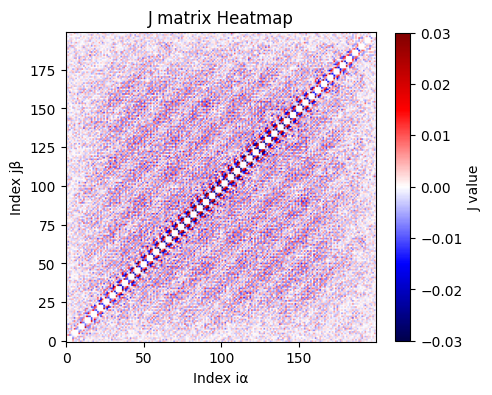

In [13]:
plt.figure(figsize=(5, 5))
plt.imshow(Jmatrix_ML, cmap='seismic', vmin=-0.03, vmax=0.03, origin = 'lower')
plt.colorbar(label='J value', shrink = 0.8)
plt.title("J matrix Heatmap")
plt.xlabel("Index i⍺")
plt.ylabel("Index jβ")
plt.show()

#### Training G on the generated sequences

In [14]:
Gtensor_ML = ce.trainG10k(MLonehot, MLc0, batchSize = 10_000, updates = True, update_int = 3)

Trained 1 of 10 batches
Trained 4 of 10 batches
Trained 7 of 10 batches
Trained 10 of 10 batches


### Visualizing predictions on the entire Random Library using J trained on generated sequences

In [15]:
Jmatrix_inv =  ce.ReverseComplementInvariance(ce.TranslationInvariance(Jmatrix_ML))
Gtensor_inv =  ce.ReverseComplementInvariance_G(ce.TranslationInvariance_G(Gtensor_ML))

Pearson correlation: 0.06, [-0.02, 0.02]
Pearson correlation: 0.691, [-0.009, 0.009]
Pearson correlation: 0.698, [-0.009, 0.009]
Pearson correlation: 0.34, [-0.02, 0.02]
Pearson correlation: 0.32, [-0.02, 0.02]
Pearson correlation: 0.783, [-0.007, 0.007]


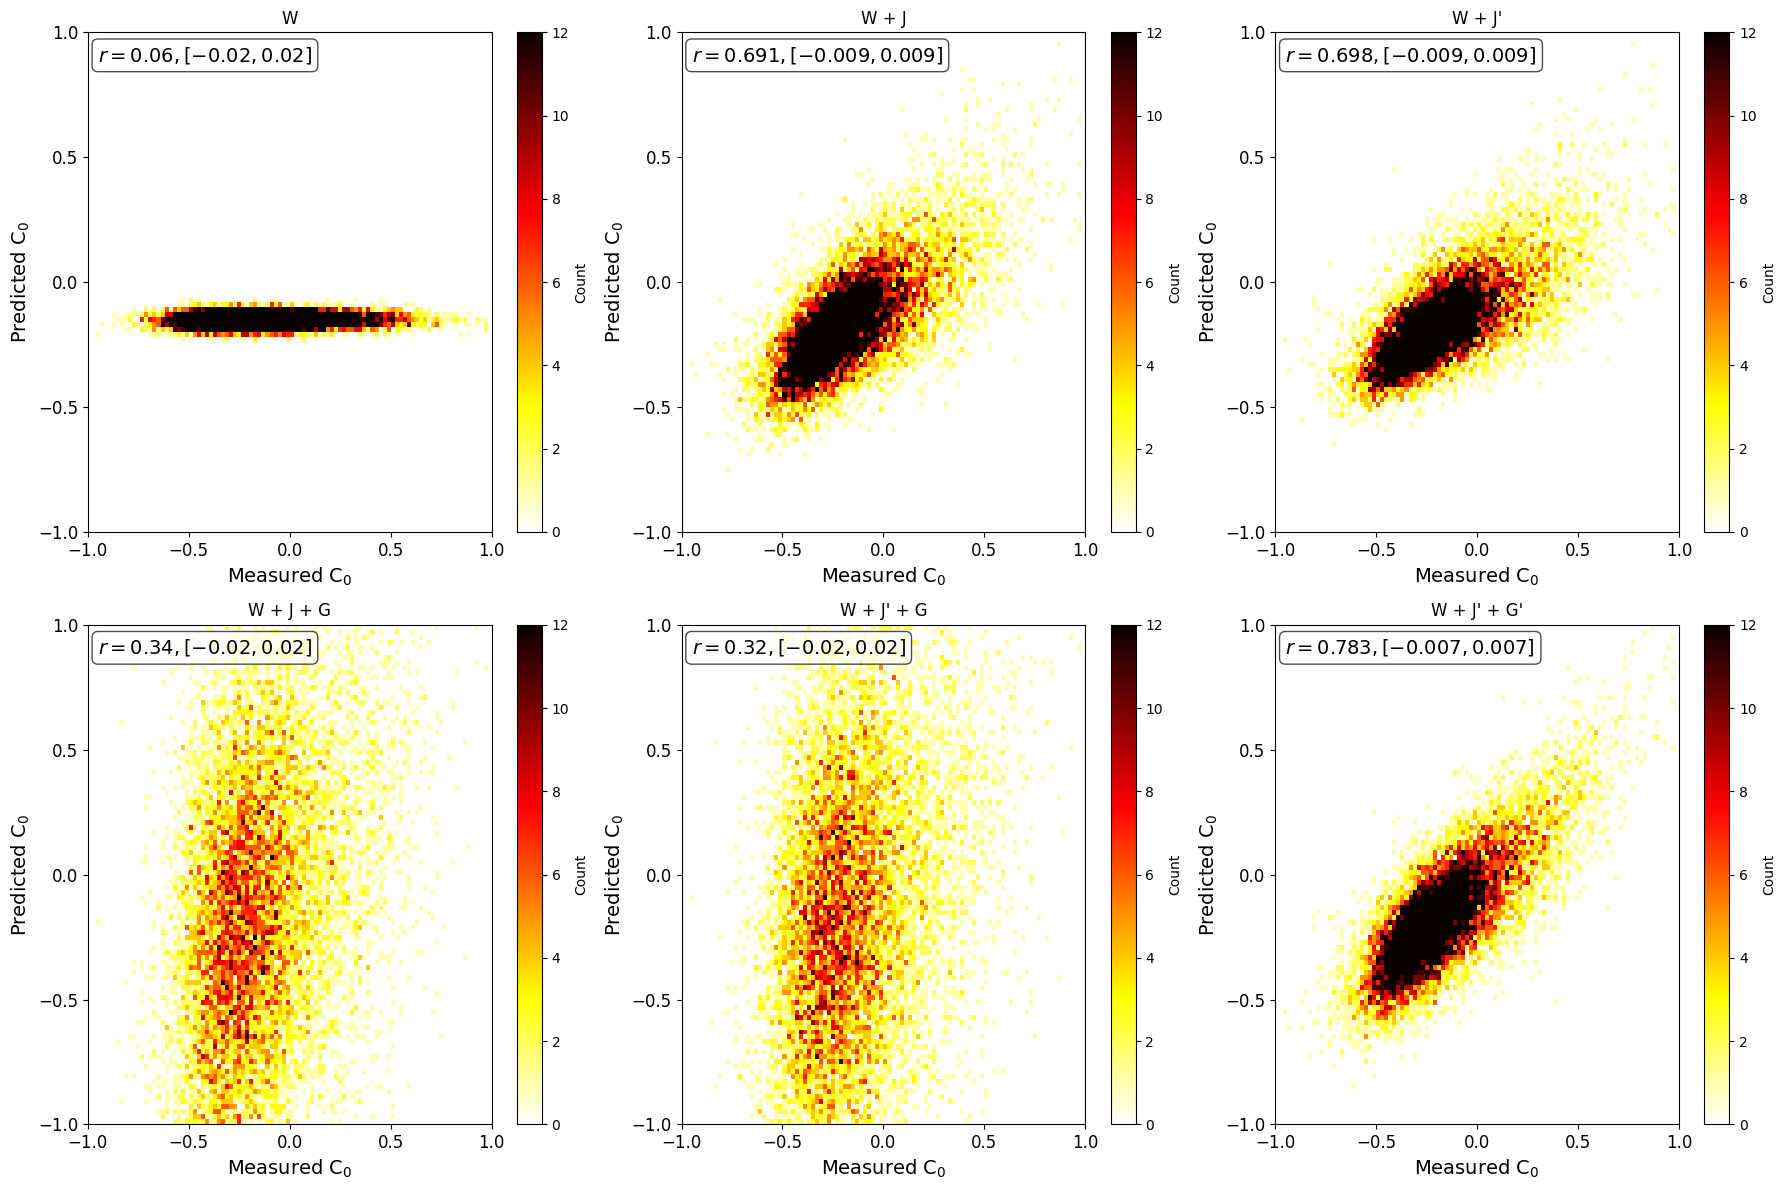

In [16]:
# collect c0Test results for each configuration (won't modify plot_hist2d)
cases = [
    ce.c0Test(onehotArray2, c0Array2, W = Wvector_ML),
    ce.c0Test(onehotArray2, c0Array2, W = Wvector_ML, J = Jmatrix_ML),
    ce.c0Test(onehotArray2, c0Array2, W = Wvector_ML, J = Jmatrix_inv),
    ce.c0Test(onehotArray2, c0Array2, W = Wvector_ML, J = Jmatrix_ML, G = Gtensor_ML),
    ce.c0Test(onehotArray2, c0Array2, W = Wvector_ML, J = Jmatrix_inv, G = Gtensor_ML),
    ce.c0Test(onehotArray2, c0Array2, W = Wvector_ML, J = Jmatrix_inv, G = Gtensor_inv)
]

titles = ["W", "W + J", "W + J'", "W + J + G", "W + J' + G", "W + J' + G'"]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# backup and monkeypatch plt.figure/plt.show so the function uses current axes instead of making a new figure
_orig_fig, _orig_show = plt.figure, plt.show
plt.figure = lambda *a, **k: plt.gcf()
plt.show = lambda *a, **k: None

try:
    for ax, (pred_arr, r, rErr, prec), title in zip(axes, cases, titles):
        plt.sca(ax)
        ce.plot_hist2d(c0Array2, pred_arr, r, rErr, vmin=0, vmax=12, fig_dim=5, n_bins=100, precision=prec)
        ax.set_title(title)
finally:
    plt.figure, plt.show = _orig_fig, _orig_show

plt.tight_layout()

save = False
if save:
    plt.savefig(f'{numSequences}_seqs.png')

plt.show()

### Visualizing predictions on the entire Random Library using G trained on generated sequences

#### Results:

##### `50K Sequences`
$$
\begin{aligned}
\text{W: } &\quad \textcolor{#FFB378}{0.054 \pm 0.009} \\
\text{W + J: } &\quad \textcolor{#FFB378}{0.641 \pm 0.007} \\
\text{W + J': } &\quad \textcolor{#FFB378}{0.693 \pm 0.006} \\
\text{W + J + G: } &\quad \textcolor{#FFB378}{0.255 \pm 0.009} \\
\text{W + J' + G: } &\quad \textcolor{#FFB378}{0.234 \pm 0.009} \\
\text{W + J' + G': } &\quad \textcolor{#FFB378}{0.720 \pm 0.006} \\
\end{aligned}
$$

##### `100K Sequences`
$$
\begin{aligned}
\text{W: } &\quad \textcolor{#FFB378}{0.071 \pm 0.009} \\
\text{W + J: } &\quad \textcolor{#FFB378}{0.689 \pm 0.007} \\
\text{W + J': } &\quad \textcolor{#FFB378}{0.698 \pm 0.006} \\
\text{W + J + G: } &\quad \textcolor{#FFB378}{0.357 \pm 0.008} \\
\text{W + J' + G: } &\quad \textcolor{#FFB378}{0.329 \pm 0.008} \\
\text{W + J' + G': } &\quad \textcolor{#FFB378}{0.778 \pm 0.006} \\
\end{aligned}
$$